# Star Wars Movies Scripts Analysis
Student name - Kushmi Anuththara Chandrasena

## 1. Importing Libraries

In [8]:
# Import necessary libraries
!pip install wordcloud nltk

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')

print("Libraries imported successfully!")


Libraries imported successfully!


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kushi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kushi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kushi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\kushi\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## 2. Loading Data

In [9]:
# Load the scripts
file_paths = [
    r'C:\\Users\\kushi\\OneDrive\\Documents\\DU_Files\\Business Inteligence\\Lab4\\Lab4_dataset\\star_wars_movies_scripts\\SW_EpisodeIV.txt',
    r'C:\\Users\\kushi\\OneDrive\\Documents\\DU_Files\\Business Inteligence\\Lab4\\Lab4_dataset\\star_wars_movies_scripts\\SW_EpisodeV.txt',
    r'C:\\Users\\kushi\\OneDrive\\Documents\\DU_Files\\Business Inteligence\\Lab4\\Lab4_dataset\\star_wars_movies_scripts\\SW_EpisodeVI.txt'
]

# Combine scripts into a single dataframe
data = []
for file_path in file_paths:
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()
        for line in lines:
            if line.strip():  # Skip empty lines
                data.append(line.strip())

print("Data loaded and combined successfully!")
print(data[:10])  # Print first 10 lines to check


Data loaded and combined successfully!
['"character" "dialogue"', '"1" "THREEPIO" "Did you hear that?  They\'ve shut down the main reactor.  We\'ll be destroyed for sure.  This is madness!"', '"2" "THREEPIO" "We\'re doomed!"', '"3" "THREEPIO" "There\'ll be no escape for the Princess this time."', '"4" "THREEPIO" "What\'s that?"', '"5" "THREEPIO" "I should have known better than to trust the logic of a half-sized thermocapsulary dehousing assister..."', '"6" "LUKE" "Hurry up!  Come with me!  What are you waiting for?!  Get in gear!"', '"7" "THREEPIO" "Artoo! Artoo-Detoo, where are you?"', '"8" "THREEPIO" "At last!  Where have you been?"', '"9" "THREEPIO" "They\'re heading in this direction. What are we going to do?  We\'ll be sent to the spice mines of Kessel or smashed into who knows what!"']


## 3. Creating DataFrame

In [10]:
# Create DataFrame from the loaded data
scripts_df = pd.DataFrame(data, columns=['text'])
print("DataFrame created successfully!")
print(scripts_df.head())


DataFrame created successfully!
                                                text
0                             "character" "dialogue"
1  "1" "THREEPIO" "Did you hear that?  They've sh...
2                     "2" "THREEPIO" "We're doomed!"
3  "3" "THREEPIO" "There'll be no escape for the ...
4                      "4" "THREEPIO" "What's that?"


## 4. Parsing Character and Dialogue

In [11]:
# Define a function to parse the character and dialogue using regex
def parse_character_dialogue(row):
    match = re.match(r'^(\d+)\s+"([^"]+)"\s+"([^"]+)"$', row)
    if match:
        return match.groups()
    return None, None, row

# Apply the function to each row in the dataframe
parsed = scripts_df['text'].apply(parse_character_dialogue)
parsed_df = pd.DataFrame(parsed.tolist(), columns=['line_number', 'character', 'dialogue'])

print("Character and dialogue parsed successfully!")
print(parsed_df.head())


Character and dialogue parsed successfully!
  line_number character                                           dialogue
0        None      None                             "character" "dialogue"
1        None      None  "1" "THREEPIO" "Did you hear that?  They've sh...
2        None      None                     "2" "THREEPIO" "We're doomed!"
3        None      None  "3" "THREEPIO" "There'll be no escape for the ...
4        None      None                      "4" "THREEPIO" "What's that?"


## 5. Frequency Distribution of Words

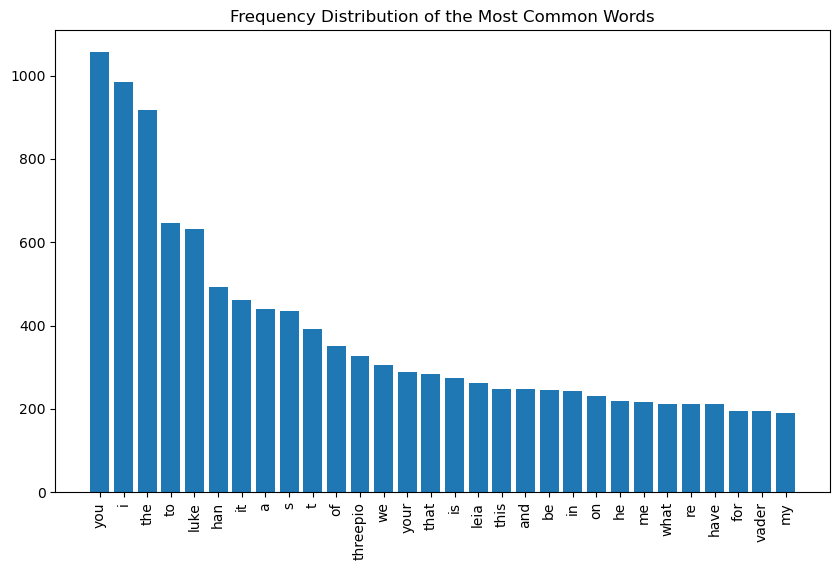

In [12]:
# Combine all dialogues into one large text
all_scripts = ' '.join(parsed_df['dialogue'].dropna().astype(str))

# Tokenize the text using regular expressions
tokens = re.findall(r'\b\w+\b', all_scripts.lower())

# Calculate frequency distribution
from collections import Counter
fdist = Counter(tokens)

# Plot the most common words
most_common_words = fdist.most_common(30)
words, counts = zip(*most_common_words)

plt.figure(figsize=(10, 6))
plt.bar(words, counts)
plt.title("Frequency Distribution of the Most Common Words")
plt.xticks(rotation=90)
plt.show()


## 6. Remove Stop Words and Recalculate Frequency Distribution

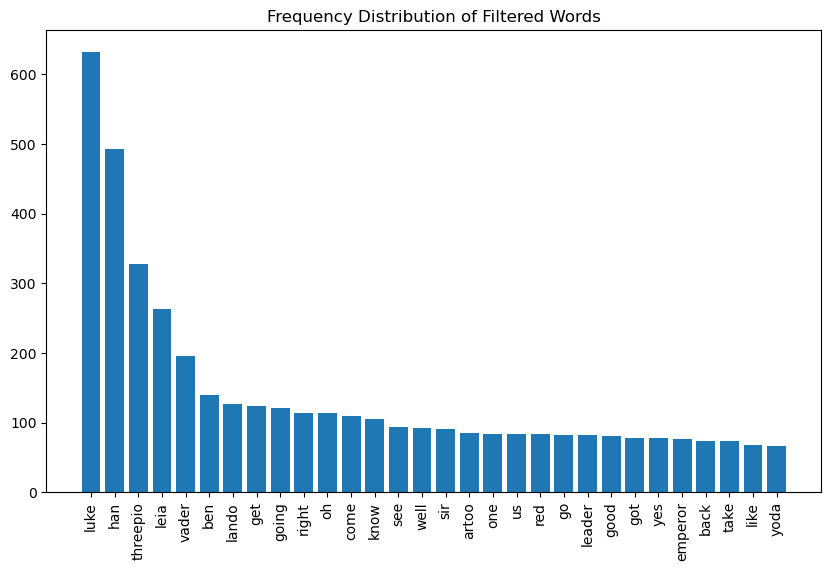

In [13]:
# Define stop words
stop_words = set(stopwords.words('english'))

# Remove stop words from the list of words
filtered_words = [word for word in tokens if word not in stop_words]

# Calculate frequency distribution for the filtered words
fdist_filtered = Counter(filtered_words)

# Plot the most common filtered words
most_common_filtered_words = fdist_filtered.most_common(30)
filtered_words, filtered_counts = zip(*most_common_filtered_words)

plt.figure(figsize=(10, 6))
plt.bar(filtered_words, filtered_counts)
plt.title("Frequency Distribution of Filtered Words")
plt.xticks(rotation=90)
plt.show()


## 7. Generate Word Clouds

In [15]:
from PIL import Image

# Load the images
vader_mask = np.array(Image.open(r'C:\\Users\\kushi\\OneDrive\\Documents\\DU_Files\\Business Inteligence\\Lab4\\Lab4_dataset\\wordcloud_masks\\vader.jpg'))
yoda_mask = np.array(Image.open(r'C:\\Users\\kushi\\OneDrive\\Documents\\DU_Files\\Business Inteligence\\Lab4\\Lab4_dataset\\wordcloud_masks\\yoda.png'))

# Function to generate word cloud
def generate_word_cloud(text, title, mask=None):
    wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS, mask=mask).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Check unique character names
unique_characters = parsed_df['character'].str.upper().unique()
print("Unique characters:", unique_characters)

# Generate word cloud for Darth Vader
darth_vader_lines = parsed_df[parsed_df['character'].str.upper() == 'VADER']['dialogue'].dropna().astype(str).values
if len(darth_vader_lines) > 0:
    generate_word_cloud(' '.join(darth_vader_lines), "Darth Vader Word Cloud", mask=vader_mask)
else:
    print("No dialogues found for Darth Vader")

# Generate word cloud for Yoda
yoda_lines = parsed_df[parsed_df['character'].str.upper() == 'YODA']['dialogue'].dropna().astype(str).values
if len(yoda_lines) > 0:
    generate_word_cloud(' '.join(yoda_lines), "Yoda Word Cloud", mask=yoda_mask)
else:
    print("No dialogues found for Yoda")


Unique characters: [None]
No dialogues found for Darth Vader
No dialogues found for Yoda


## 8. TF-IDF Analysis

In [16]:
# Apply TF-IDF vectorizer
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(parsed_df['dialogue'].dropna().astype(str))

# Get feature names
feature_names = tfidf.get_feature_names_out()

# Summarize TF-IDF results
tfidf_scores = np.sum(tfidf_matrix.toarray(), axis=0)
tfidf_scores_df = pd.DataFrame(tfidf_scores, index=feature_names, columns=['TF-IDF'])

# Sort by TF-IDF score
tfidf_scores_df = tfidf_scores_df.sort_values(by='TF-IDF', ascending=False)

# Display the top 10 words
tfidf_scores_top10 = tfidf_scores_df.head(10)
tfidf_scores_top10


,TF-IDF
luke,119.685520
han,98.585715
leia,69.998609
threepio,69.503458
vader,46.293810
don,40.778939
ben,37.360562
ll,36.845355
lando,36.239237
come,32.647771


# 9. Sentiment Analysis

In [17]:
# Initialize the sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Apply sentiment analysis
parsed_df['Sentiment'] = parsed_df['dialogue'].dropna().apply(lambda x: sia.polarity_scores(str(x))['compound'])

# Display sentiment analysis results
sentiment_analysis_results = parsed_df[['character', 'dialogue', 'Sentiment']].head()
sentiment_analysis_results


,character,dialogue,Sentiment
0,None,"""character"" ""dialogue""",0.0000
1,None,"""1"" ""THREEPIO"" ""Did you hear that? They've sh...",-0.2942
2,None,"""2"" ""THREEPIO"" ""We're doomed!""",0.0000
3,None,"""3"" ""THREEPIO"" ""There'll be no escape for the ...",-0.1280
4,None,"""4"" ""THREEPIO"" ""What's that?""",0.0000


# 10. Plot Sentiment Distribution

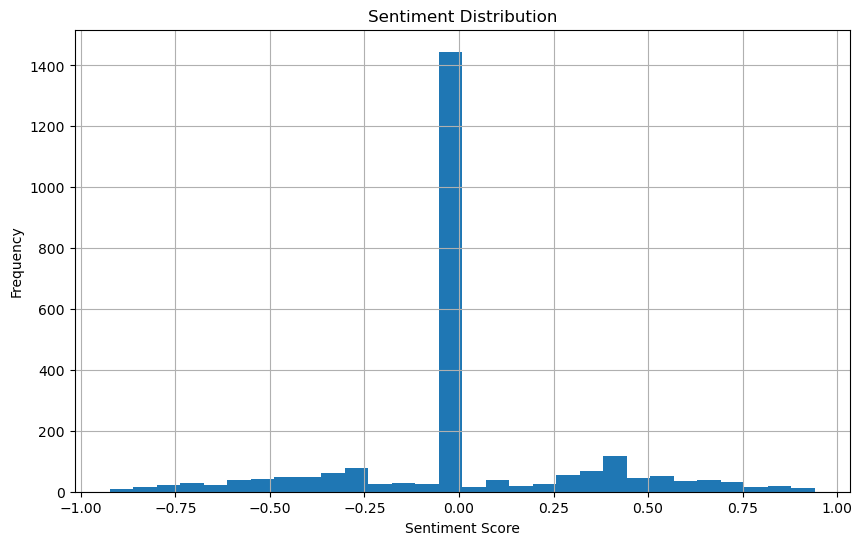

In [18]:
# Plot sentiment distribution
plt.figure(figsize=(10, 6))
parsed_df['Sentiment'].hist(bins=30)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()
